In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import ast

In [3]:
G = nx.Graph()

with open('adjacency_2024-03-15.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        node = row[0]
        connected_nodes = ast.literal_eval(row[1])
        
        for connected_node in connected_nodes:
            G.add_edge(node, connected_node)

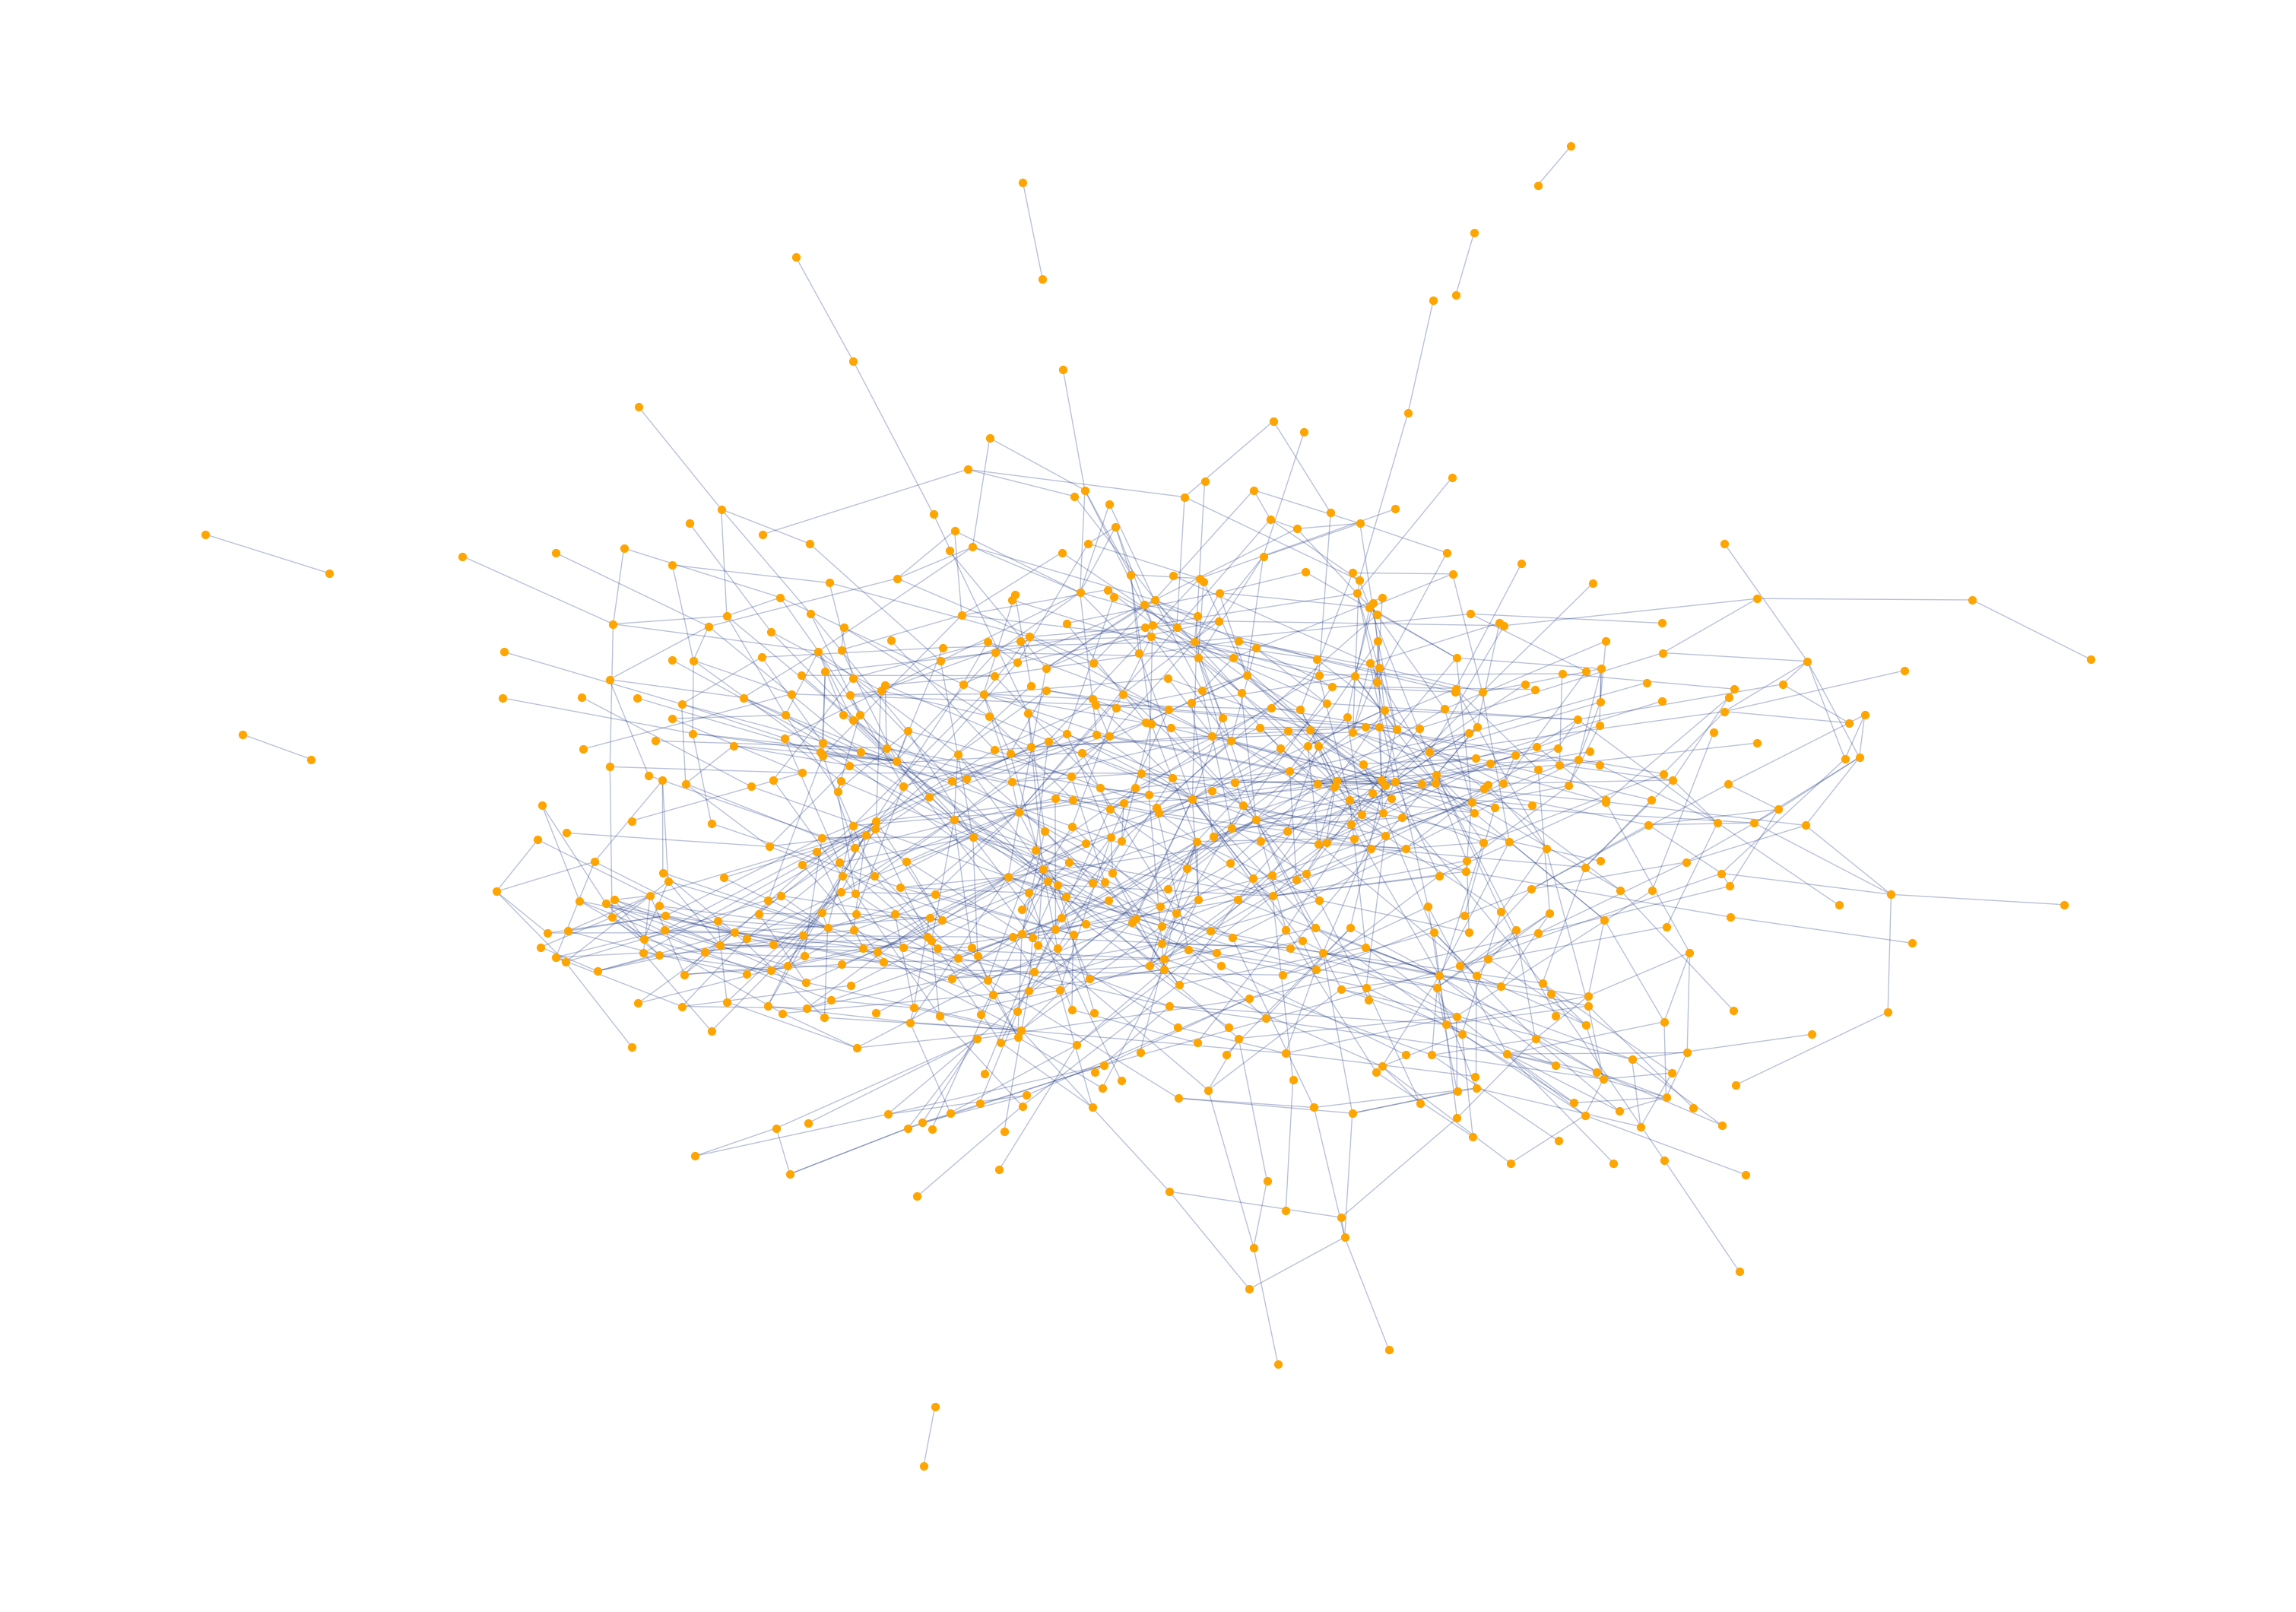

In [62]:
plt.figure(figsize=(30, 21)) 
nx.draw(G, 
        pos = nx.spring_layout(G, k= 0.1, weight='7.0'),
        with_labels = False, 
        font_size = 16, 
        node_size = 50, 
        node_color = 'orange', 
        edge_color = (0.1, 0.2, 0.5, 0.3)
       )
plt.show()

In [98]:
# first visualization that I think is somewhat telling
# 1) the graph is very dense
# 2) there are some outliers, disconnected from the main clustered topics

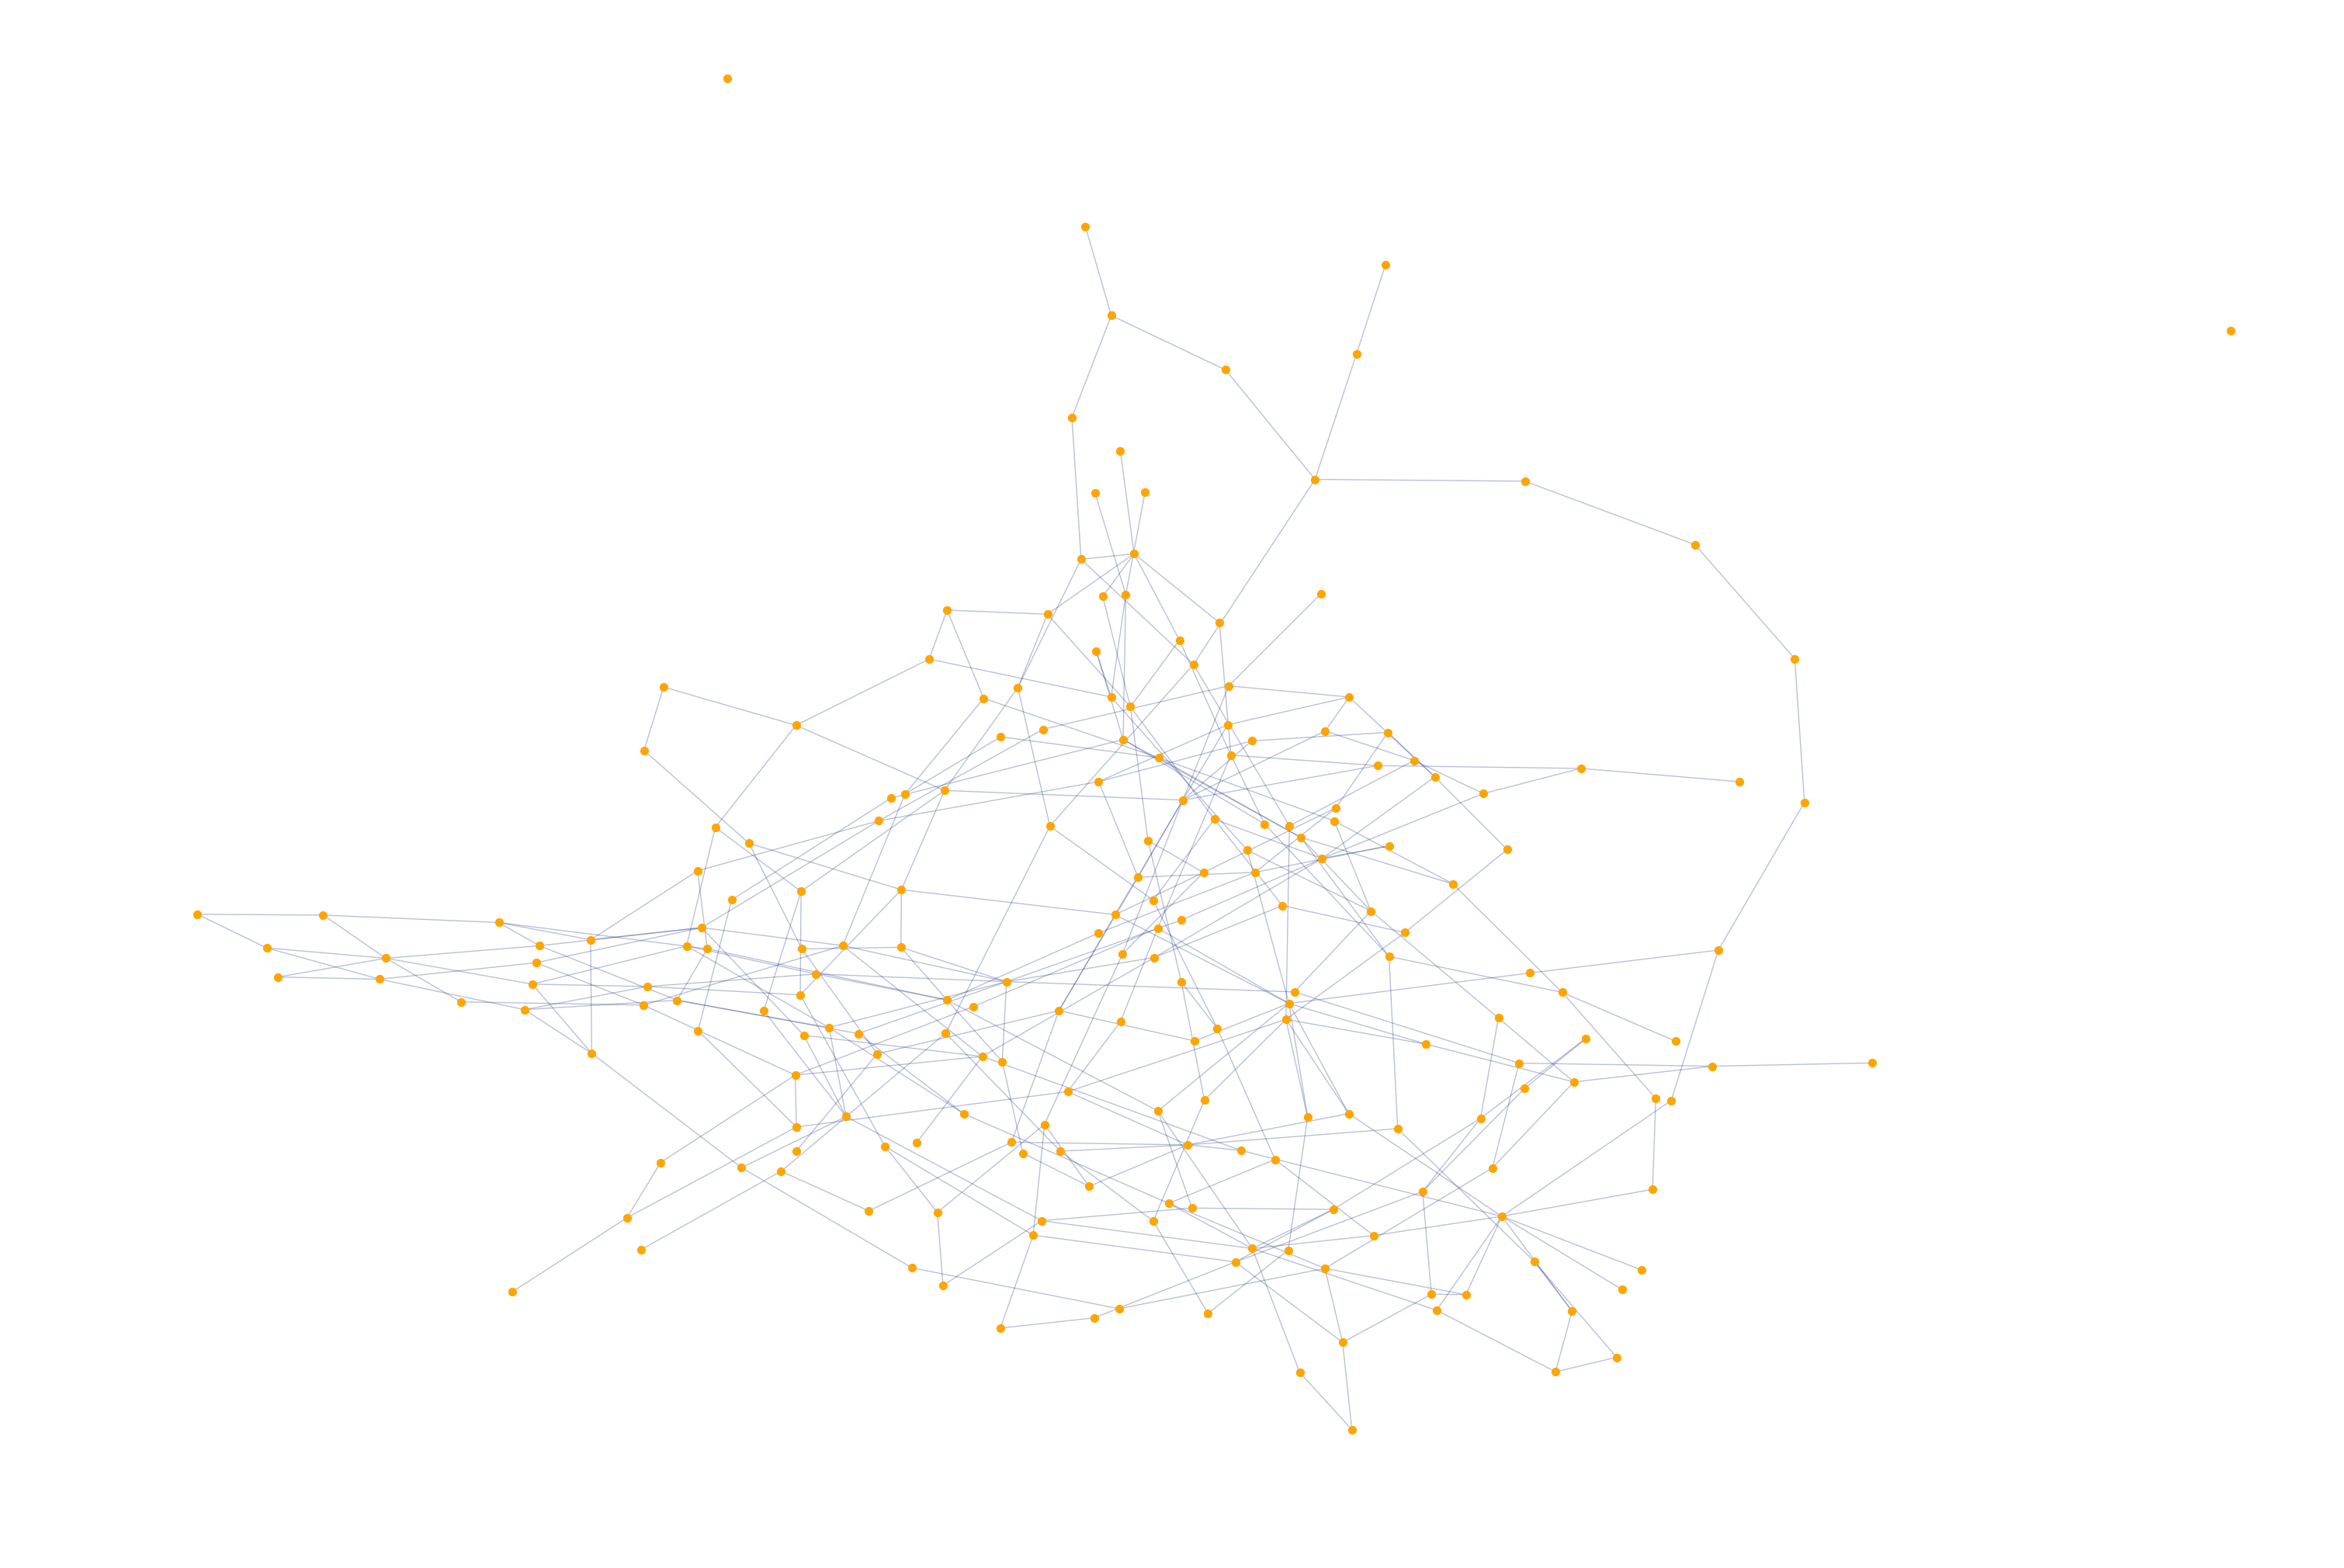

In [182]:
# trying to make it less dense by showing the cluster center
threshold = 4 
main_nodes = [node for node, degree in G.degree() if degree > threshold]

# subgraph for only the nodes that have > 4 edges
H = G.subgraph(main_nodes)


plt.figure(figsize=(30, 20)) 
nx.draw(H, 
        pos = nx.spring_layout(H, k=0.1),
        with_labels = False, 
        node_size = 50, 
        node_color = 'orange', 
        edge_color = (0.1, 0.2, 0.5, 0.3)
       )
plt.show()

In [180]:
# A subgraph where all nodes with degree < 4 have been removed
# Showing only the most recurrent/similar articles

# what are the two outliers?
# means they're sort of separate from the main topics on HN, but still pop up often 
outlier_nodes = [node for node, degree in H.degree() if degree == 0]

print(outlier_nodes)

['39615715', '39691808']


In [194]:
# adding labels to the most connected nodes + the outliers
# hypothesis being I can derive most trending topic clusters from this
threshold = 6
important_nodes = [node for node, degree in dict(H.degree()).items() if degree > threshold] 
important_nodes += [node for node, degree in dict(H.degree()).items() if degree == 0] 

# for now the labels are just the article IDs
labels = {node: node for node in important_nodes}

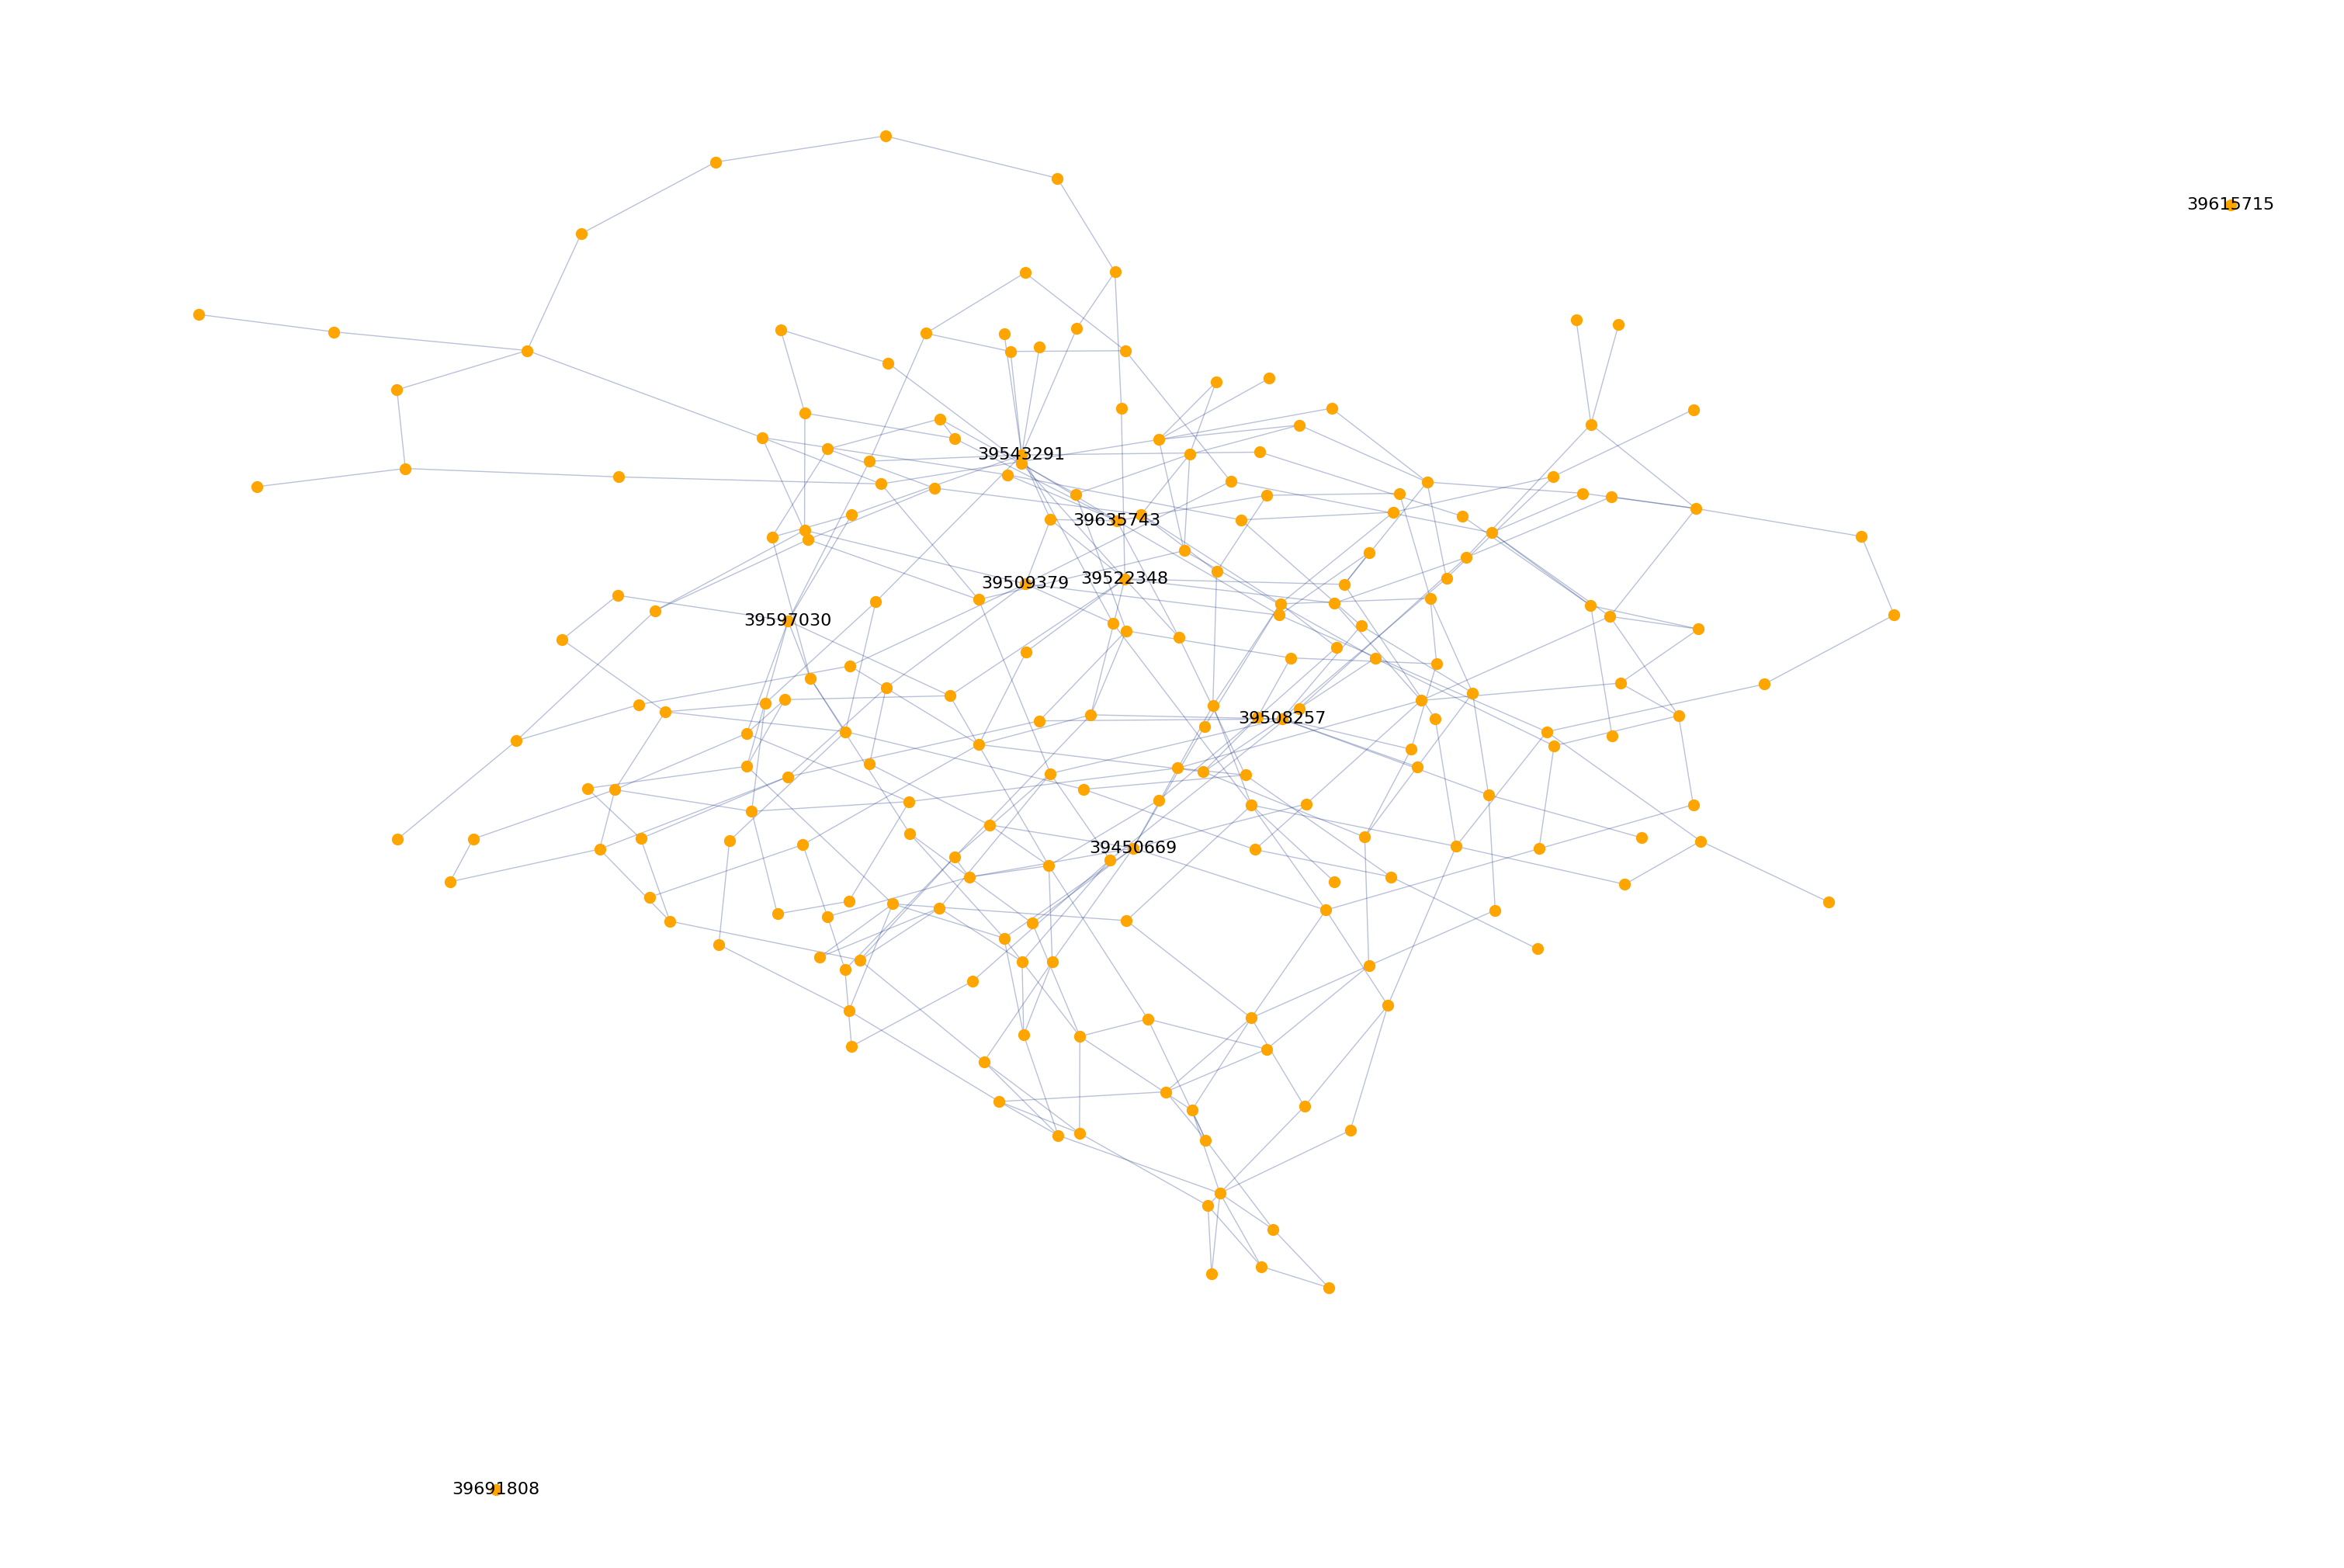

In [193]:
plt.figure(figsize=(30, 20)) 
nx.draw(H, 
        pos = nx.spring_layout(H, k=0.1),
        labels = labels, 
        font_size = 16, 
        node_size = 100, 
        node_color = 'orange', 
        edge_color = (0.1, 0.2, 0.5, 0.3)
       )
plt.show()